In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
df_sparse = pd.read_csv('generated_sparse_batch_size.csv', index_col=0)

In [3]:
df_real = pd.read_csv('real_datasets_batch_size.csv', index_col=0)

In [4]:
df_generated = pd.read_csv('generated_dense_batch_size.csv', index_col=0)

In [5]:
BASE_FONT_SIZE=20
# sns.set_palette(sns.color_palette("hls", 8)
# )

In [6]:
df_memory = pd.read_csv('../data/generated_dense_memory.csv')

df_memory = df_memory[df_memory['|W|'].isin([100000,1000000, 10000000])]
df_sparse_memory = pd.read_csv('../data/sparse_generated_memory.csv')

In [7]:
df_sparse_memory

,DataFile,metric,method,wX,wY,ID,|W|,logWX,logWY,memory,logMemory,Method,sparsity
0,../../Hobotnica-GPU/results/GeneratedSparseBat...,kendall,GPU,1000,10000,1000_10000,10000000,3.0,4.0,1.274930e+08,8.105487,kendall_GPU,0.90
1,../../Hobotnica-GPU/results/GeneratedSparseBat...,kendall,GPU,1000,10000,1000_10000,10000000,3.0,4.0,7.349298e+07,7.866246,kendall_GPU,0.95
2,../../Hobotnica-GPU/results/GeneratedSparseBat...,kendall,GPU,1000,10000,1000_10000,10000000,3.0,4.0,2.894930e+08,8.461638,kendall_GPU,0.75
3,../../Hobotnica-GPU/results/GeneratedSparseBat...,kendall,GPU,1000,10000,1000_10000,10000000,3.0,4.0,3.029298e+07,7.481342,kendall_GPU,0.99
4,../../Hobotnica-GPU/results/GeneratedSparseBat...,kendall,GPU,1000,10000,1000_10000,10000000,3.0,4.0,5.594930e+08,8.747795,kendall_GPU,0.50
5,../../Hobotnica-GPU/results/GeneratedSparseBat...,kendall,GPU,10000,10,10000_10,100000,4.0,1.0,1.279144e+09,9.106919,kendall_GPU,0.90
6,../../Hobotnica-GPU/results/GeneratedSparseBat...,kendall,GPU,10000,10,10000_10,100000,4.0,1.0,1.275363e+09,9.105634,kendall_GPU,0.95
7,../../Hobotnica-GPU/results/GeneratedSparseBat...,kendall,GPU,10000,10,10000_10,100000,4.0,1.0,1.290484e+09,9.110753,kendall_GPU,0.75
8,../../Hobotnica-GPU/results/GeneratedSparseBat...,kendall,GPU,10000,10,10000_10,100000,4.0,1.0,1.272338e+09,9.104603,kendall_GPU,0.99
9,../../Hobotnica-GPU/results/GeneratedSparseBat...,kendall,GPU,10000,10,10000_10,100000,4.0,1.0,1.309384e+09,9.117067,kendall_GPU,0.50


In [8]:
methods = ['amap', 'factoextra', 'pythonic', 'pandas', 'CPU', 'GPU', 'sparse_CPU', 'sparse_GPU']

palette = sns.palettes.color_palette()[:len(methods)]
color_palette = {
    method: pallete for method, pallete in zip(methods, palette)
}

sparse_methods = ['scipy', 'pandas', 'factoextra', 'amap', 'GADES-CPU-dense', 'GADES-GPU-dense', 'GADES-CPU-sparse', 'GADES-GPU-sparse']

palette = sns.palettes.color_palette()[:len(methods)]
sparse_color_palette = {
    method: pallete for method, pallete in zip(sparse_methods, palette)
}

In [9]:
np.array(sparse_color_palette['GADES-GPU-dense']) * 255

array([140.,  86.,  75.])

In [10]:
np.array(sparse_color_palette['GADES-CPU-sparse']) * 255

array([227., 119., 194.])

In [11]:
def rgbtohex(elements):
    return '#%02x%02x%02x' % tuple(elements.astype(int))

In [12]:
rgbtohex(np.array(sparse_color_palette['GADES-CPU-dense']) * 255)

'#9467bd'

In [13]:
base_methods = ['scipy', 'pandas', 'factoextra', 'amap','GADES-GPU-dense']

## Memory usage

In [26]:
def read_memory_R(filename):
    df = pd.read_csv(filename, sep=' ')
    if 'V4' in df.columns:
        return df.iloc[0]['V4']
    else:
        return (df.iloc[0]['V1'] - df.iloc[0]['V3']) / 10

counts = {
    'B_CD8T': 474521,
    'B_T': 1435388,
    'PBMC_all': 2238732,
    'TCells': 1280445,
    'PBMC5K': 72208619,
    'Chen': 22331703,
    'Camp': 2762889,
    'HLCA_aorta': 1026532,
    'HLCA_lung': 4317000,
    'HLCA_marrow': 15854124,
    'CellLines': 5516980,
    'HSC': 13634167,
    'FibrocardRNA': 50000000,
    'FibrocardATAC': 138840495, 
}

In [27]:
import os
DATASETS = [
        'B_T', 'B_CD8T', 'PBMC_all', 'TCells', 'PBMC5K', 'Chen', 'Camp', 'HSC', 'HLCA_aorta', 'HLCA_lung', 'HLCA_marrow', 'CellLines',
        'FibrocardRNA', 'FibrocardATAC'
]
def get_input_data(from_range, to_range):

    outputs = []

    for dataset in DATASETS:
        for method in ['sparse_GPU']:
            metric = 'kendall'
            filename = f'../results/RealDatasetsBatchSizeFixedMemory/{dataset}/500/{method}_{metric}_memory.csv'
            # print(filename)
            if os.path.exists(filename):
                memory = read_memory_R(filename)
                output = {
                    'metric': metric,
                    'dataset': dataset,
                    'memory': memory,
                    'method': method,
                    'missing': False,
                }

                outputs.append(output)

    return pd.DataFrame(outputs)

In [28]:
df_memory_real = get_input_data(0, 0)

In [29]:
df_memory_real

,metric,dataset,memory,method,missing
0,kendall,B_T,23646208.0,sparse_GPU,False
1,kendall,B_CD8T,11628544.0,sparse_GPU,False
2,kendall,PBMC_all,82477056.0,sparse_GPU,False
3,kendall,TCells,75108352.0,sparse_GPU,False
4,kendall,Chen,390291456.0,sparse_GPU,False
5,kendall,Camp,126173184.0,sparse_GPU,False
6,kendall,HSC,362815488.0,sparse_GPU,False
7,kendall,HLCA_aorta,65744896.0,sparse_GPU,False
8,kendall,HLCA_lung,131067904.0,sparse_GPU,False
9,kendall,HLCA_marrow,721215524.8,sparse_GPU,False


In [30]:
df_memory_real['num_elements'] = df_memory_real.apply(lambda x: counts[x['dataset']], axis=1)

In [31]:
df_memory_real['log_memory'] = np.log10(df_memory_real['memory'])
df_memory_real['log_elements'] = np.log10(df_memory_real['num_elements'])

In [32]:
df_memory_real

,metric,dataset,memory,method,missing,num_elements,log_memory,log_elements
0,kendall,B_T,23646208.0,sparse_GPU,False,1435388,7.373762,6.156969
1,kendall,B_CD8T,11628544.0,sparse_GPU,False,474521,7.065525,5.676255
2,kendall,PBMC_all,82477056.0,sparse_GPU,False,2238732,7.916333,6.350002
3,kendall,TCells,75108352.0,sparse_GPU,False,1280445,7.875688,6.107361
4,kendall,Chen,390291456.0,sparse_GPU,False,22331703,8.591389,7.348922
5,kendall,Camp,126173184.0,sparse_GPU,False,2762889,8.100967,6.441363
6,kendall,HSC,362815488.0,sparse_GPU,False,13634167,8.559686,7.134629
7,kendall,HLCA_aorta,65744896.0,sparse_GPU,False,1026532,7.817862,6.011372
8,kendall,HLCA_lung,131067904.0,sparse_GPU,False,4317000,8.117496,6.635182
9,kendall,HLCA_marrow,721215524.8,sparse_GPU,False,15854124,8.858065,7.200142


In [33]:
df_memory_real

,metric,dataset,memory,method,missing,num_elements,log_memory,log_elements
0,kendall,B_T,23646208.0,sparse_GPU,False,1435388,7.373762,6.156969
1,kendall,B_CD8T,11628544.0,sparse_GPU,False,474521,7.065525,5.676255
2,kendall,PBMC_all,82477056.0,sparse_GPU,False,2238732,7.916333,6.350002
3,kendall,TCells,75108352.0,sparse_GPU,False,1280445,7.875688,6.107361
4,kendall,Chen,390291456.0,sparse_GPU,False,22331703,8.591389,7.348922
5,kendall,Camp,126173184.0,sparse_GPU,False,2762889,8.100967,6.441363
6,kendall,HSC,362815488.0,sparse_GPU,False,13634167,8.559686,7.134629
7,kendall,HLCA_aorta,65744896.0,sparse_GPU,False,1026532,7.817862,6.011372
8,kendall,HLCA_lung,131067904.0,sparse_GPU,False,4317000,8.117496,6.635182
9,kendall,HLCA_marrow,721215524.8,sparse_GPU,False,15854124,8.858065,7.200142


In [38]:
df_memory_other = pd.read_csv('./MemoryUsageAmapPythonic.csv')

In [36]:
df_memory_other

,metric,dataset,memory,method,missing,num_elements,log_memory,log_elements
0,kendall,B_T,"426579518,8",amap,False,1435388,"8,63",6.156969
1,kendall,B_CD8T,"151356124,8",amap,False,474521,"8,18",5.676255
2,kendall,TCells,"616595001,9",amap,False,1280445,"8,79",6.107361
3,kendall,Camp,"239883291,9",amap,False,2762889,"8,38",6.441363
4,kendall,HLCA_aorta,"158489319,2",amap,False,1026532,"8,2",6.011372
5,kendall,B_T,514137200,scipy,False,1435388,"8,71",6.156969
6,kendall,B_CD8T,129752828,scipy,False,474521,"8,11",5.676255
7,kendall,PBMC_all,919314544,scipy,False,2238732,"8,96",6.350002
8,kendall,TCells,438789980,scipy,False,1280445,"8,64",6.107361
9,kendall,Camp,220102000,scipy,False,2762889,"8,34",6.441363


In [39]:
df_memory_all = pd.concat([df_memory_other, df_memory_real])

In [40]:
def to_float(element):
    # print(element)
    if isinstance(element, (float, int)):
        return element
    return float(element.replace(',', '.'))

In [41]:
df_memory_all['memory'] = df_memory_all['memory'].apply(to_float)
df_memory_all['log_memory'] = df_memory_all['log_memory'].apply(to_float)

In [42]:
import statsmodels.formula.api as sm

In [43]:
df_memory_all[df_memory_all['method'] == 'GADES-GPU-sparse']

,metric,dataset,memory,method,missing,num_elements,log_memory,log_elements


In [44]:
df_memory.loc[df_memory['method'] == 'pythonic', 'method'] = 'scipy'
df_memory.loc[df_memory['method'] == 'GPU', 'method'] = 'GADES-GPU-dense'

In [45]:
df_memory_all.loc[
    df_memory_all['method'] == 'sparse_GPU', 'method'
] = 'GADES-GPU-sparse'

In [46]:
df_memory_all

,metric,dataset,memory,method,missing,num_elements,log_memory,log_elements
0,kendall,B_T,4.265795e+08,amap,False,1435388,8.630000,6.156969
1,kendall,B_CD8T,1.513561e+08,amap,False,474521,8.180000,5.676255
2,kendall,TCells,6.165950e+08,amap,False,1280445,8.790000,6.107361
3,kendall,Camp,2.398833e+08,amap,False,2762889,8.380000,6.441363
4,kendall,HLCA_aorta,1.584893e+08,amap,False,1026532,8.200000,6.011372
5,kendall,B_T,5.141372e+08,scipy,False,1435388,8.710000,6.156969
6,kendall,B_CD8T,1.297528e+08,scipy,False,474521,8.110000,5.676255
7,kendall,PBMC_all,9.193145e+08,scipy,False,2238732,8.960000,6.350002
8,kendall,TCells,4.387900e+08,scipy,False,1280445,8.640000,6.107361
9,kendall,Camp,2.201020e+08,scipy,False,2762889,8.340000,6.441363


In [47]:
df_memory_all[df_memory_all['dataset'].isin(['TCells', 'Celllines', 'HSC'])]

,metric,dataset,memory,method,missing,num_elements,log_memory,log_elements
2,kendall,TCells,616595001.9,amap,False,1280445,8.790000,6.107361
8,kendall,TCells,438789980.0,scipy,False,1280445,8.640000,6.107361
16,kendall,TCells,406834984.0,pandas,False,1280445,8.610000,6.107361
3,kendall,TCells,75108352.0,GADES-GPU-sparse,False,1280445,7.875688,6.107361
6,kendall,HSC,362815488.0,GADES-GPU-sparse,False,13634167,8.559686,7.134629


In [48]:
df_test = pd.read_csv('../data/generated_dense.csv')

In [49]:
df_filtered = df_test[['method', 'wX', 'wY', '|W|', 'mean_sequential', 'logMeanTime']]

In [50]:
df_filtered['cells'] = df_filtered['wX']
df_filtered['features'] = df_filtered['wY']

df_filtered['average'] = df_filtered['mean_sequential']


/home/akhtyamovpavel/PythonEnvironments/BioInfoPython37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/akhtyamovpavel/PythonEnvironments/BioInfoPython37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/akhtyamovpavel/PythonEnvironments/BioInfoPython37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying t

In [51]:
df_filtered[['method', 'cells', 'features', '|W|', 'average', 'logMeanTime']].sort_values(['|W|', 'cells', 'features', 'method']).to_csv('to_export.csv', index=None)

In [52]:
methods = ['amap', 'factoextra', 'scipy', 'pandas', 'GADES-CPU-dense', 'GADES-GPU-dense', 'GADES-CPU-sparse', 'GADES-GPU-sparse']
palette = sns.palettes.color_palette()[:len(methods)]
color_palette = {
    method: pallete for method, pallete in zip(methods, palette)
}

def hex2palette(color):
    lines = color.lstrip('#')
    return tuple(int(lines[i:i+2], 16) / 255 for i in (0, 2, 4))

In [53]:
def get_category(x):
    return f'{x["method"]}{x["dataset"]}{x["metric"]}'

def get_category_lookup(x):
    return f'dense_GPU{x["dataset"]}{x["metric"]}'

def vlookup(df, x):
    return df.set_index('cated').loc[x['vlookup_cated'], 'mean']

In [54]:
boxplot_memory = []

for dataset in DATASETS:
    base_method = 'GADES-GPU-sparse'

    df_dataset = df_memory_all[df_memory_all['dataset'] == dataset]

    if df_dataset.shape[0] == 0:
        continue

    memory_subset = df_dataset[df_dataset['method'] == base_method]
    if memory_subset.shape[0] == 0:
        continue
    base_memory = memory_subset.iloc[0]['memory']
    for method in ['amap', 'scipy', 'pandas']:
        compared_method_subset = df_dataset[df_dataset['method'] == method]
        if compared_method_subset.shape[0] == 0:
            continue
        result_memory = compared_method_subset.iloc[0]['memory']
        # print(method, result_memory / base_memory)
        boxplot_memory.append({
            'method': method,
            'result': result_memory / base_memory,
        })

memory_improvement = pd.DataFrame(boxplot_memory)

In [55]:
memory_improvement.head()

,method,result
0,amap,18.040081
1,scipy,21.742903
2,pandas,10.886988
3,amap,13.015914
4,scipy,11.158132


## Draw ablation study chart

0.125 0.5771925133689839 0.775 0.3028074866310162
0.125 0.125 0.775 0.30280748663101603


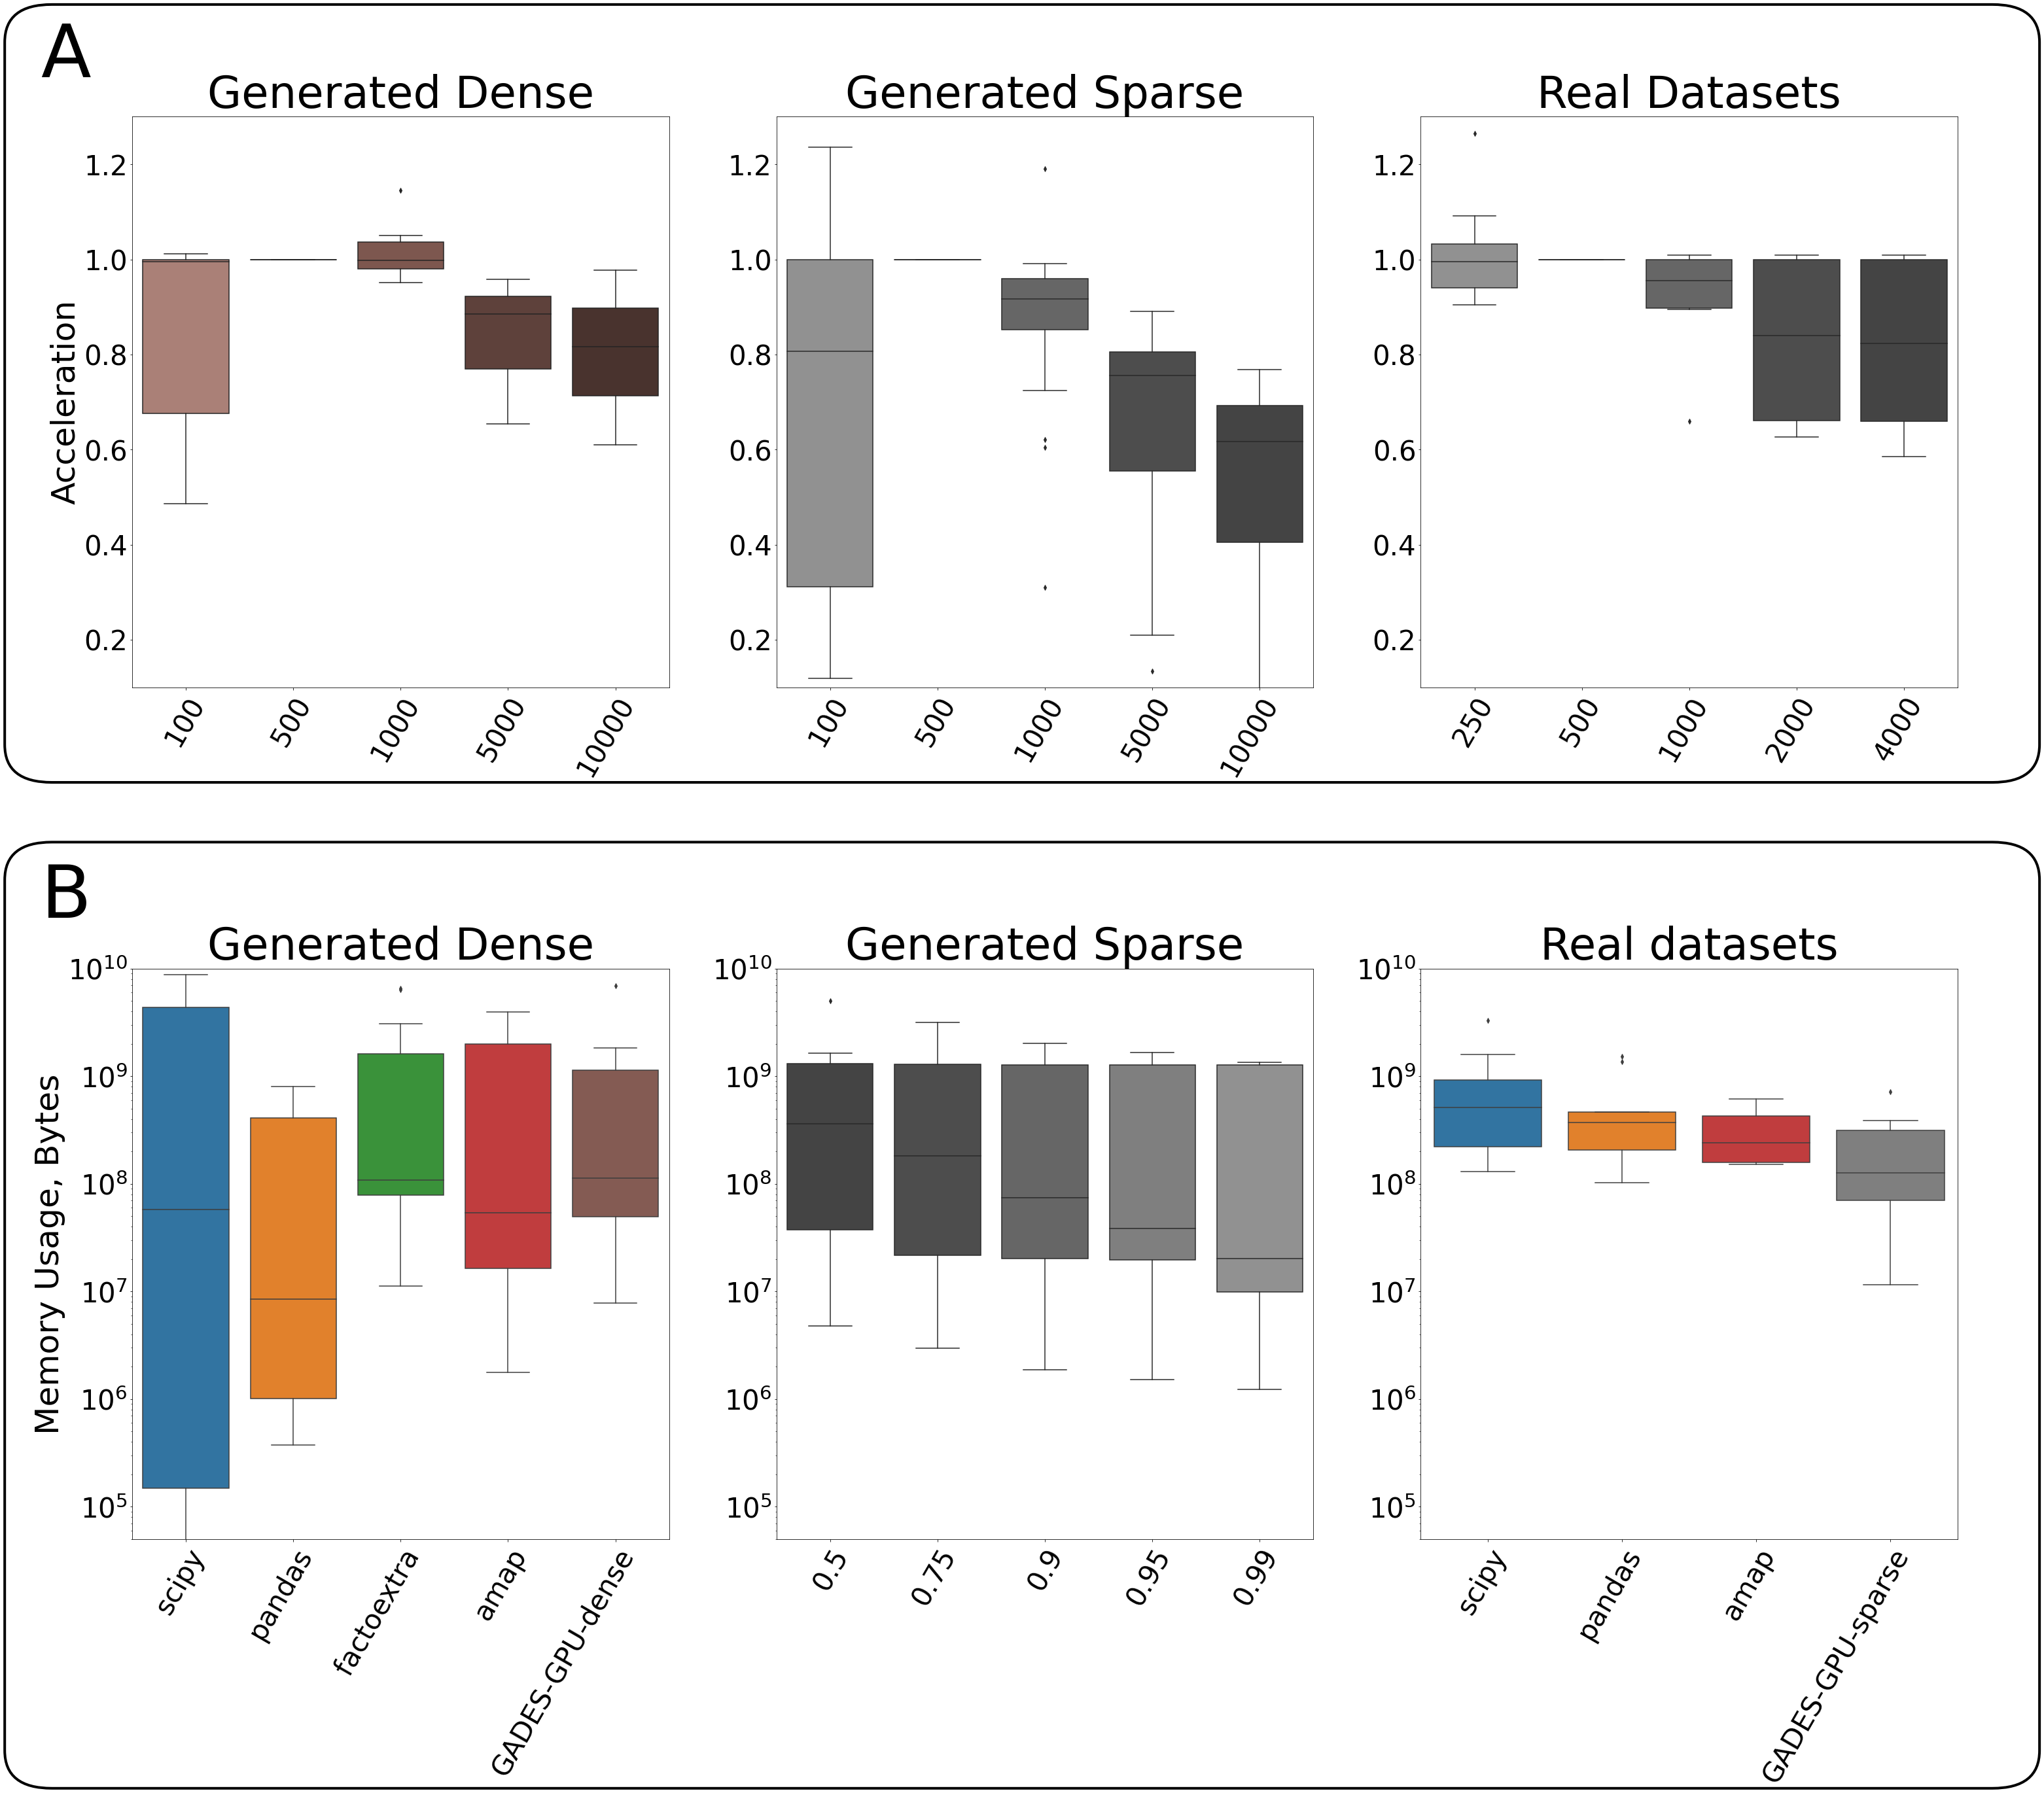

In [122]:
from copy import copy
from matplotlib.gridspec import GridSpec
from matplotlib.patches import FancyBboxPatch

fig = plt.figure(figsize=(50, 40))
gs = GridSpec(3, 3, figure=fig, height_ratios=[1, 0.2, 1], width_ratios=[1, 1, 1])
BASE_FONT_SIZE=28

# fig.canvas.draw()

current_ax = fig.add_subplot(gs[0, 0:3])
current_ax.axis('off')
bbox = current_ax.get_tightbbox(fig.canvas.get_renderer())
x0, y0, width, height = bbox.transformed(fig.transFigure.inverted()).bounds
print(x0, y0, width, height)
# slightly increase the very tight bounds:
xpad = 0.05 * width
ypad = 0.05 * height
fig.add_artist(
    FancyBboxPatch(
        (x0- 1.5 * xpad, y0 - 3.6 * ypad), width + 2.5 * xpad, height+ 7.8 * ypad, edgecolor='black', linewidth=4, fill=False,
        boxstyle='round,pad=-0.0040,rounding_size=0.02',
        mutation_aspect=1,
    )
)
current_ax.text(-0.05, 1.07, 'A', fontdict={'size': BASE_FONT_SIZE * 4}, transform=current_ax.transAxes)


TITLE_FONT_SIZE = BASE_FONT_SIZE * 2.4

current_ax=fig.add_subplot(gs[0, 0])
plot = sns.boxplot(data=df_generated, x='batch_size', y='acceleration',  ax=current_ax, palette={
    100: hex2palette('#b27a6f'),
    1000: hex2palette('#855247'),
    5000: hex2palette('#643d35'),
    10000: hex2palette('#4d302a'),
    500: hex2palette('#8c564b'),
})
plot.set_xticklabels(plot.get_xticklabels(), rotation=60, fontsize=BASE_FONT_SIZE * 1.5, ha='right', va='top', rotation_mode='anchor')
plot.set_ylabel(f'Acceleration', fontsize=BASE_FONT_SIZE * 1.8)
plot.set_xlabel(f'', fontsize=BASE_FONT_SIZE * 1.5)
plot.set_ylim(0.1, 1.3)
current_ax.tick_params(labelsize=BASE_FONT_SIZE * 1.5)
plot.set_title('Generated Dense', fontsize=TITLE_FONT_SIZE)

current_ax=fig.add_subplot(gs[0, 1])
plot = sns.boxplot(data=df_sparse, x='batch_size', y='acceleration',  ax=current_ax, palette={
    100: hex2palette('#919191'),
    1000: hex2palette('#666666'),
    5000: hex2palette('#4d4d4d'),
    10000: hex2palette('#444444'),
    500: hex2palette('#444444'),
})
plot.set_xticklabels(plot.get_xticklabels(), rotation=60, fontsize=BASE_FONT_SIZE * 1.5, ha='right', va='top', rotation_mode='anchor')
plot.set_ylabel(f'', fontsize=BASE_FONT_SIZE * 1.8)
plot.set_xlabel(f'', fontsize=BASE_FONT_SIZE * 1.5)
current_ax.tick_params(labelsize=BASE_FONT_SIZE * 1.5)
plot.set_ylim(0.1, 1.3)
plot.set_title('Generated Sparse', fontsize=TITLE_FONT_SIZE)

current_ax=fig.add_subplot(gs[0, 2])
plot = sns.boxplot(data=df_real, x='batch_size', y='acceleration',  ax=current_ax, palette={
    250: hex2palette('#919191'),
    1000: hex2palette('#666666'),
    2000: hex2palette('#4d4d4d'),
    4000: hex2palette('#444444'),
    500: hex2palette('#444444'),
})
plot.set_xticklabels(plot.get_xticklabels(), rotation=60, fontsize=BASE_FONT_SIZE * 1.5, ha='right', va='top', rotation_mode='anchor')
plot.set_ylabel(f'', fontsize=BASE_FONT_SIZE * 1.8)
plot.set_xlabel(f'', fontsize=BASE_FONT_SIZE * 1.5)
current_ax.tick_params(labelsize=BASE_FONT_SIZE * 1.5)
plot.set_title('Real Datasets', fontsize=TITLE_FONT_SIZE)
plot.set_ylim(0.1, 1.3)




current_ax = fig.add_subplot(gs[2, 0:3])
current_ax.axis('off')
bbox = current_ax.get_tightbbox(fig.canvas.get_renderer())
x0, y0, width, height = bbox.transformed(fig.transFigure.inverted()).bounds
print(x0, y0, width, height)
# slightly increase the very tight bounds:
xpad = 0.05 * width
ypad = 0.05 * height
fig.add_artist(
    FancyBboxPatch(
        (x0- 1.5 * xpad, y0 - 9 * ypad), width + 2.5 * xpad, height+ 13.7 * ypad, edgecolor='black', linewidth=4, fill=False,
        boxstyle='round,pad=-0.0040,rounding_size=0.02',
        mutation_aspect=1,
    )
)
current_ax.text(-0.05, 1.09, 'B', fontdict={'size': BASE_FONT_SIZE * 4}, transform=current_ax.transAxes)

hue_order = ['amap', 'factoextra', 'pandas','pythonic', 'GPU']
TESTED_METHODS = hue_order


current_ax=fig.add_subplot(gs[2, 0])
current_ax.set(yscale="log")
plot = sns.boxplot(data=df_memory, x='method', order=base_methods, y='memory', ax=current_ax, palette=sparse_color_palette)
plot.set_xticklabels(plot.get_xticklabels(), rotation=60, fontsize=BASE_FONT_SIZE * 1.5, ha='right', va='top', rotation_mode='anchor')
plot.set_ylabel(f'Memory Usage, Bytes', fontsize=BASE_FONT_SIZE * 1.8)
plot.set_xlabel(f'', fontsize=BASE_FONT_SIZE * 1.5)
plot.set_ylim(5 * 10** 4, 10** 10)
# plot.set_ylim(4, 10)
current_ax.tick_params(labelsize=BASE_FONT_SIZE * 1.5)
plot.set_title('Generated Dense', fontsize=TITLE_FONT_SIZE)


current_ax=fig.add_subplot(gs[2, 1])
current_ax.set(yscale="log")
plot = sns.boxplot(data=df_sparse_memory, y='memory', x='sparsity', ax=current_ax, palette={
    0.99: hex2palette('#919191'),
    0.95: hex2palette('#7f7f7f'),
    0.9: hex2palette('#666666'),
    0.75: hex2palette('#4d4d4d'),
    0.5: hex2palette('#444444'),
})
plot.set_xticklabels(plot.get_xticklabels(), rotation=60, fontsize=BASE_FONT_SIZE * 1.5, ha='right', va='top', rotation_mode='anchor')
plot.set_ylabel(f'', fontsize=BASE_FONT_SIZE * 1.8)
plot.set_xlabel(f'', fontsize=BASE_FONT_SIZE * 1.5)
plot.set_ylim(5 * 10** 4, 10** 10)
current_ax.tick_params(labelsize=BASE_FONT_SIZE * 1.5)
plot.set_title('Generated Sparse', fontsize=TITLE_FONT_SIZE)

current_ax=fig.add_subplot(gs[2, 2])
current_ax.set(yscale="log")

plot = sns.boxplot(
    order=['scipy', 'pandas', 'amap', 'GADES-GPU-sparse'],
    data=df_memory_all,
    x='method', y='memory', ax=current_ax,
    palette=sparse_color_palette,
)
plot.set_ylabel(f'', fontsize=BASE_FONT_SIZE * 1.8)
plot.set_xlabel(f'', fontsize=BASE_FONT_SIZE * 1.8)
plot.set_title('Real datasets', fontsize=TITLE_FONT_SIZE)
plot.set_ylim(5 * 10** 4, 10** 10)
# plot.axhline(y=1.0, color='r', linestyle='-',label="GADES-GPU-dense\nbaseline", linewidth=3)
current_ax.tick_params(labelsize=BASE_FONT_SIZE * 1.5)
plot.set_xticklabels(plot.get_xticklabels(), rotation=60, fontsize=BASE_FONT_SIZE * 1.5, ha='right', va='top', rotation_mode='anchor')


plt.savefig('figure6.png', bbox_inches='tight', dpi=300)

In [123]:
result = sm.ols(formula="log_memory ~ log_elements", data=df_memory_all[df_memory_all['method'] == 'GADES-GPU-sparse']).fit()

In [124]:
result.rsquared_adj

0.8499852041623288

In [60]:
cells = {
    'B_CD8T': 623,
    'B_T': 1806,
    'PBMC_all': 2700,
    'HLCA_marrow': 5037,
    'HLCA_lung': 1716,
    'HLCA_aorta': 408,
    'HSC': 2034,
    'Camp': 734,
    'FibrocardRNA': 27999,
    'FibrocardATAC': 79514,
    'TCells': 765,
    'CellLines': 1224,
    'Chen': 4029,
}

In [61]:
features = {
    'B_CD8T': 13714,
    'PBMC_all': 13714,
    'B_T': 13714,
    'HLCA_marrow': 23341,
    'HLCA_lung': 23341,
    'HLCA_aorta': 23341,
    'Camp': 18927,
    'HSC': 234000,
    'Chen': 20058,
    'TCells': 49345,
    'CellLines': 125648,
}

In [62]:
df_memory_all['cells'] = df_memory_all['dataset'].apply(lambda x: cells[x])
df_memory_all['features'] = df_memory_all['dataset'].apply(lambda x: features[x])

df_memory_all['counts'] = df_memory_all['cells'] * df_memory_all['features']
df_memory_all['log_counts'] = np.log10(df_memory_all['counts'])

### Calculate $R^2$ stats

In [63]:
r2_stats = []

for method in ['amap', 'scipy', 'pandas', 'GADES-GPU-sparse']:
    for feature in ['log_elements', 'log_counts']:
        # print(df_memory_all[df_memory_all['method'] == method])
        result = sm.ols(
            formula=f"log_memory ~ {feature}",
            data=df_memory_all[df_memory_all['method'] == method]
        ).fit()
        r2_stats.append({
            'method': method,
            'feature': feature,
            'r2': np.round(result.rsquared_adj, 3)
        })

In [64]:
r2_table = pd.DataFrame(r2_stats).pivot(values='r2', index='method', columns='feature')
# .to_csv('supptable4.csv')

In [65]:
r2_table

feature,log_counts,log_elements
method,,
GADES-GPU-sparse,0.556,0.850
amap,0.998,-0.100
pandas,0.983,0.732
scipy,0.895,0.722


In [66]:
r2_table.to_csv('supptable4.csv')

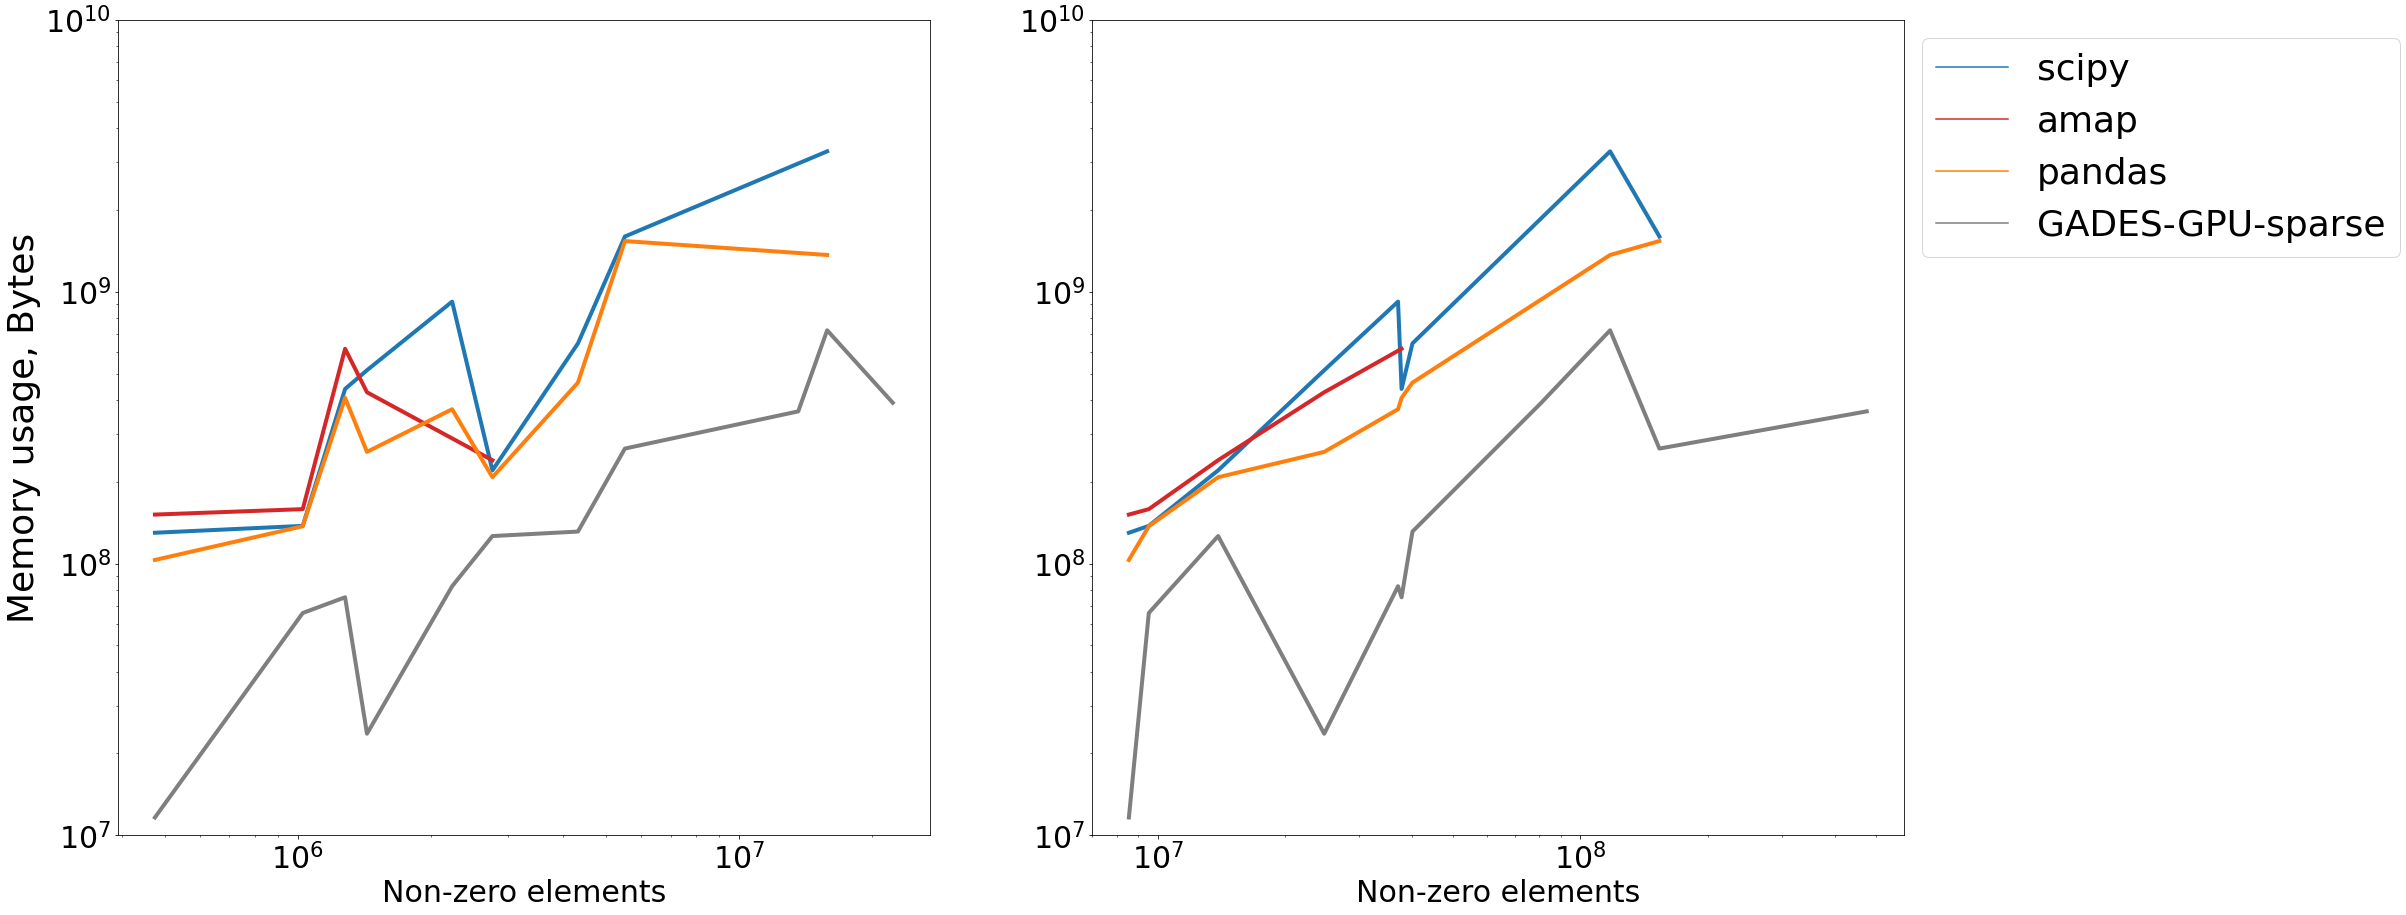

In [67]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 15))

current_ax=ax[0]

# current_ax.set(xscale="log", yscale="log")

plot = sns.lineplot(
    data=df_memory_all.reset_index(), hue='method', x='num_elements', y='memory', 
    hue_order=['scipy', 'amap', 'pandas', 'GADES-GPU-sparse'], palette=sparse_color_palette,
    linewidth=4,
    markers=True,
    ax=current_ax
)
plot.set(xscale='log')
plot.set(yscale='log')
plot.set_ylabel(f'Memory usage, Bytes', fontsize=BASE_FONT_SIZE * 1.8)
plot.set_xlabel(f'Non-zero elements', fontsize=BASE_FONT_SIZE * 1.5)
plot.set_ylim(10** 7, 10** 10)
# plot.set_xlim(5 * 10 ** 5, 5 * 10 ** 7)
# plot.set_title('Non-zero based memory usage', fontsize=BASE_FONT_SIZE * 1.5)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=60, fontsize=BASE_FONT_SIZE * 1.5, ha='right', va='top', rotation_mode='anchor')
current_ax.tick_params(labelsize=BASE_FONT_SIZE * 1.5)
# sns.move_legend(current_ax, "upper left", bbox_to_anchor=(10, 1))
# plot2 = sns.lineplot
current_ax.get_legend().remove()

current_ax=ax[1]

# current_ax.set(xscale="log", yscale="log")

plot = sns.lineplot(
    data=df_memory_all.reset_index(), hue='method', x='counts', y='memory', 
    hue_order=['scipy', 'amap', 'pandas', 'GADES-GPU-sparse'], palette=sparse_color_palette,
    linewidth=4,
    markers=True,
    ax=current_ax,
)
plot.set(xscale='log')
plot.set(yscale='log')
plot.set_ylabel(f'', fontsize=BASE_FONT_SIZE * 1.8)
plot.set_xlabel(f'Non-zero elements', fontsize=BASE_FONT_SIZE * 1.5)
plot.set_ylim(10** 7, 10** 10)
# plot.set_ylim(10** 7, 10** 10)
# plot.set_xlim(5 * 10 ** 5, 5 * 10 ** 7)
# plot.set_title('All elements', fontsize=BASE_FONT_SIZE * 1.8)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=60, fontsize=BASE_FONT_SIZE * 1.5, ha='right', va='top', rotation_mode='anchor')
current_ax.tick_params(labelsize=BASE_FONT_SIZE * 1.5)
current_ax.legend(fontsize=BASE_FONT_SIZE * 1.8, bbox_to_anchor=(1, 1))
# plot2 = sns.lineplot

plt.savefig('suppfigure4.png', dpi=200, bbox_inches='tight')